In [57]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

import warnings
warnings.simplefilter('ignore')

In [58]:
# read data
fires_df = pd.read_csv("data/forestfires.csv")
fires_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [36]:
#Select X and Y Values
X = fires_df[["temp", "RH", "wind", "rain", "FFMC", "DMC", "DC", "ISI"]]
y = fires_df["area"].values.reshape(-1,1)
print(X.shape, y.shape)

(517, 8) (517, 1)


In [37]:
# Use train_test_split to create training and testing data #computer tells you shape /rows and columns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(387, 8)
(387, 1)
(130, 8)


In [59]:
#must convert month and day into numerical format 
#using get dummies. This will be for added month and day stuff 

data = fires_df.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
X = data_binary_encoded.drop(columns=["area"])
X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
#linear regression model 

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#attempt at reshaping data 
#from sklearn.preprocessing import StandardScaler

#X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [41]:
#PREDICTIONS : Temperature

In [42]:
# make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 9450.40419272491, R2: 0.0025105774923755986


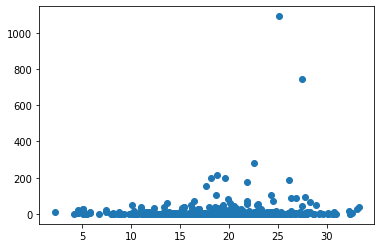

In [43]:
# make predictions for temp and area 
X1 = fires_df["temp"].values.reshape(-1,1)
y1 = fires_df["area"].values.reshape(-1,1)
plt.scatter(X1,y1)

In [44]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [45]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r2 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r2}")

MSE: 9424.972002836339, R2: 0.0051949431435914795


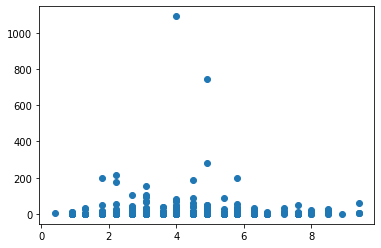

In [47]:
#Prediction WIND

X2 = fires_df["wind"].values.reshape(-1,1)
y2 = fires_df["area"].values.reshape(-1,1)
plt.scatter(X2,y2)

In [48]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [49]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions2 = model2.predict(X2_test)
MSE2 = mean_squared_error(y2_test, predictions2)
r2 = model2.score(X2_test, y2_test)

print(f"MSE: {MSE2}, R2: {r2}")

MSE: 9498.965847581108, R2: -0.002615101374969786


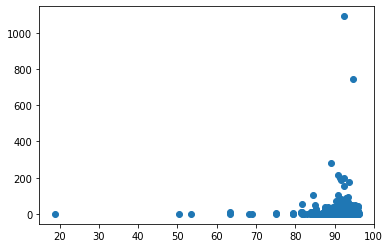

In [51]:
#prediction FFMC
X3 = fires_df["FFMC"].values.reshape(-1,1)
y3 = fires_df["area"].values.reshape(-1,1)
plt.scatter(X3,y3)


In [53]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [54]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
from sklearn.metrics import mean_squared_error

predictions3 = model3.predict(X3_test)
MSE2 = mean_squared_error(y3_test, predictions2)
r2 = model2.score(X2_test, y3_test)

print(f"MSE: {MSE2}, R2: {r2}")

MSE: 9498.965847581108, R2: -0.002615101374969786
